In [2]:
import pickle as pkl
import csv
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [30, 10]

In [3]:
result = pkl.load(open("/home/hakkelt/af_challenge_itk/result.pkl", "rb"))

In [4]:
with open('/home/hakkelt/af_challenge_itk/data/raw/training2017/REFERENCE.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        result[row[0] + '.mat']['label'] = row[1]
result

{'A04260.mat': {'class': array([ 3.17241406, -4.54928255,  0.50502527], dtype=float32),
  'decision': 'N',
  'label': 'N',
  'noise': array([-5.37149715,  6.9230814 , -1.75411808], dtype=float32)},
 'A06407.mat': {'class': array([ 3.61606479, -5.4287281 ,  0.68814993], dtype=float32),
  'decision': 'N',
  'label': 'N',
  'noise': array([-4.15274429,  6.01955605, -2.40394998], dtype=float32)},
 'A01841.mat': {'class': array([-3.22852945, -5.23902416,  4.02416754], dtype=float32),
  'decision': 'O',
  'label': 'N',
  'noise': array([-3.77305031,  5.45617199, -2.36024499], dtype=float32)},
 'A07619.mat': {'class': array([ 3.85367918, -6.83037949,  1.18829846], dtype=float32),
  'decision': 'N',
  'label': 'N',
  'noise': array([-3.5372653 ,  5.58489799, -2.81872964], dtype=float32)},
 'A02793.mat': {'class': array([ 2.19092369, -5.26461411,  1.35379982], dtype=float32),
  'decision': 'N',
  'label': 'N',
  'noise': array([-0.21122012,  2.10595417, -3.36781263], dtype=float32)},
 'A00604.m

In [5]:
def count_match(c):
    return len([_ for value in result.values()
                      if value['label'] == c and value['decision'] == c])
def count_all(c, d):
    return len([_ for value in result.values() if value[d] == c])
TP_N = count_match('N')
T_N = count_all('N', 'label')
P_N = count_all('N', 'decision')
TP_O = count_match('O')
T_O = count_all('O', 'label')
P_O = count_all('O', 'decision')
TP_A = count_match('A')
T_A = count_all('A', 'label')
P_A = count_all('A', 'decision')

In [6]:
'''
Rank: 25
Test: 0.8786, 0.7953, 0.6887, 0.6404
Test F1: 0.79
Training: 0.9093,0.8883,0.8181,0.5589
Training F1: 0.87
Entry: 247
'''
F1_N = 2*TP_N / (T_N + P_N)
F1_O = 2*TP_O / (T_O + P_O)
F1_A = 2*TP_A / (T_A + P_A)
F1 = (F1_N + F1_O + F1_A) / 3
F1

0.8832238598567468

In [7]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [8]:
for key in result.keys():
    result[key]['class'] = softmax(result[key]['class'])
    result[key]['noise'] = softmax(result[key]['noise'])

In [33]:
normal = {}
af = {}
for key,value in result.items():
    if value['decision'] == 'N':
        normal[key] = value['class'][0]
    elif value['decision'] == 'A':
        af[key] = value['class'] [1]

In [35]:
top_normal = sorted(normal, key=normal.get)[-10:]
top_af = sorted(af, key=af.get)[-10:]
least_normal = sorted(normal, key=normal.get)[:10]
least_af = sorted(af, key=af.get)[:10]
print(top_normal, least_normal, top_af, least_af)

['A04993.mat', 'A00044.mat', 'A04842.mat', 'A06137.mat', 'A04691.mat', 'A02778.mat', 'A00464.mat', 'A00188.mat', 'A04179.mat', 'A06825.mat'] ['A02185.mat', 'A00765.mat', 'A06364.mat', 'A01593.mat', 'A05574.mat', 'A02243.mat', 'A07161.mat', 'A00526.mat', 'A07823.mat', 'A03674.mat'] ['A06970.mat', 'A07042.mat', 'A06755.mat', 'A00798.mat', 'A07554.mat', 'A01076.mat', 'A07722.mat', 'A02845.mat', 'A03502.mat', 'A07930.mat'] ['A02899.mat', 'A02626.mat', 'A01301.mat', 'A07383.mat', 'A00610.mat', 'A04205.mat', 'A01876.mat', 'A01267.mat', 'A05841.mat', 'A03474.mat']


In [36]:
def check_rightness(fname):
    print(result[fname]['class'],result[fname]['label'], result[fname]['decision'])
    return result[fname]['label'] == result[fname]['decision']

In [37]:
cnt = 0
for n in least_normal:
    if check_rightness(n):
        cnt+=1
cnt

[ 0.38414338  0.34702641  0.26883027] N N
[ 0.40032357  0.37780172  0.22187473] N N
[ 0.42146149  0.24133272  0.3372058 ] N N
[ 0.42306077  0.38522571  0.19171353] N N
[ 0.4237982   0.31905785  0.25714397] N N
[ 0.4357129   0.1421776   0.42210948] N N
[ 0.4369612   0.28221256  0.28082618] A N
[ 0.45517462  0.3334336   0.21139175] N N
[ 0.46480969  0.08610214  0.44908819] N N
[ 0.47335505  0.21753451  0.30911046] N N


9

In [40]:
cnt = 0
for a in least_af:
    if check_rightness(a):
        cnt+=1
cnt

[ 0.23565122  0.39076671  0.37358209] A A
[ 0.39858025  0.42686659  0.17455314] N A
[ 0.24359433  0.46009216  0.29631355] A A
[ 0.20617896  0.47850728  0.31531376] N A
[ 0.3466922   0.48166698  0.1716408 ] N A
[ 0.32079053  0.48311579  0.19609374] N A
[ 0.10899122  0.48748943  0.40351936] O A
[ 0.14009567  0.49227145  0.3676329 ] A A
[ 0.04230511  0.49430943  0.46338549] O A
[ 0.01612788  0.49905419  0.48481786] O A


3

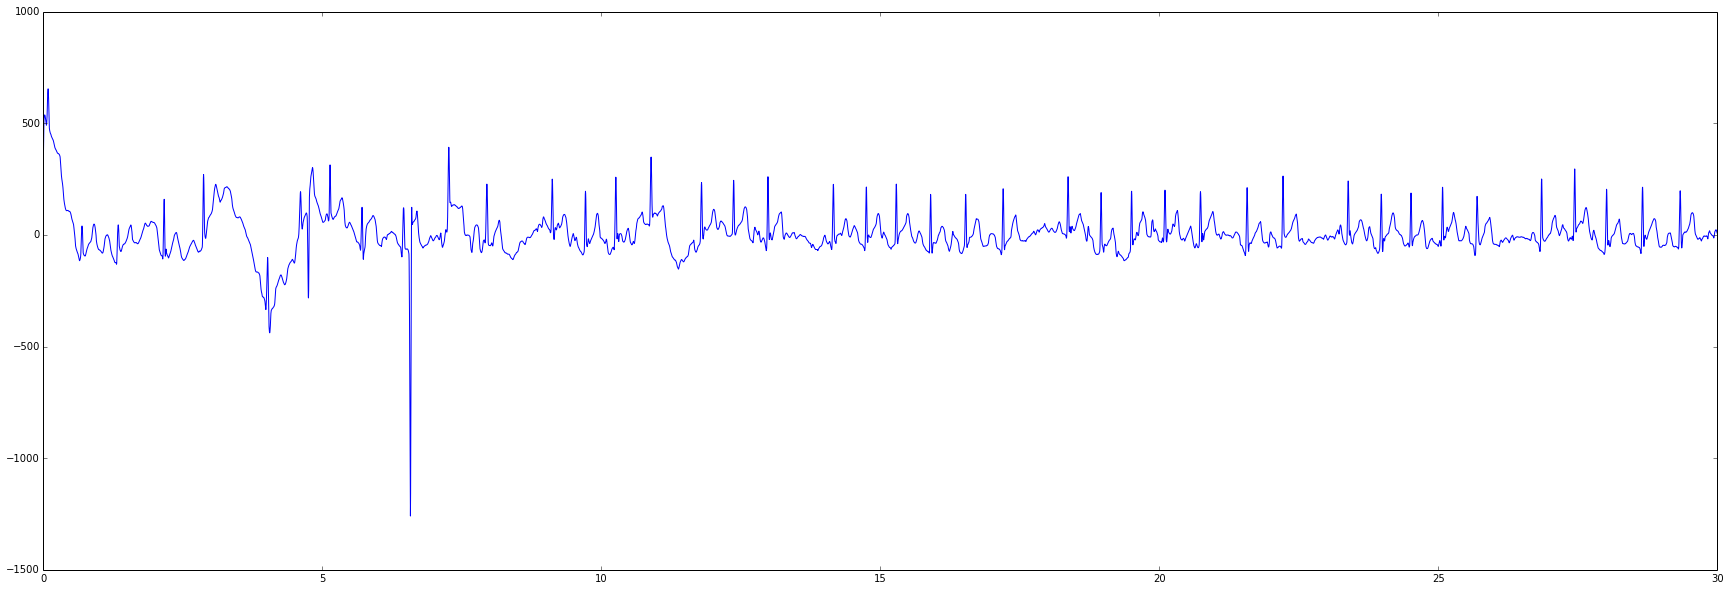

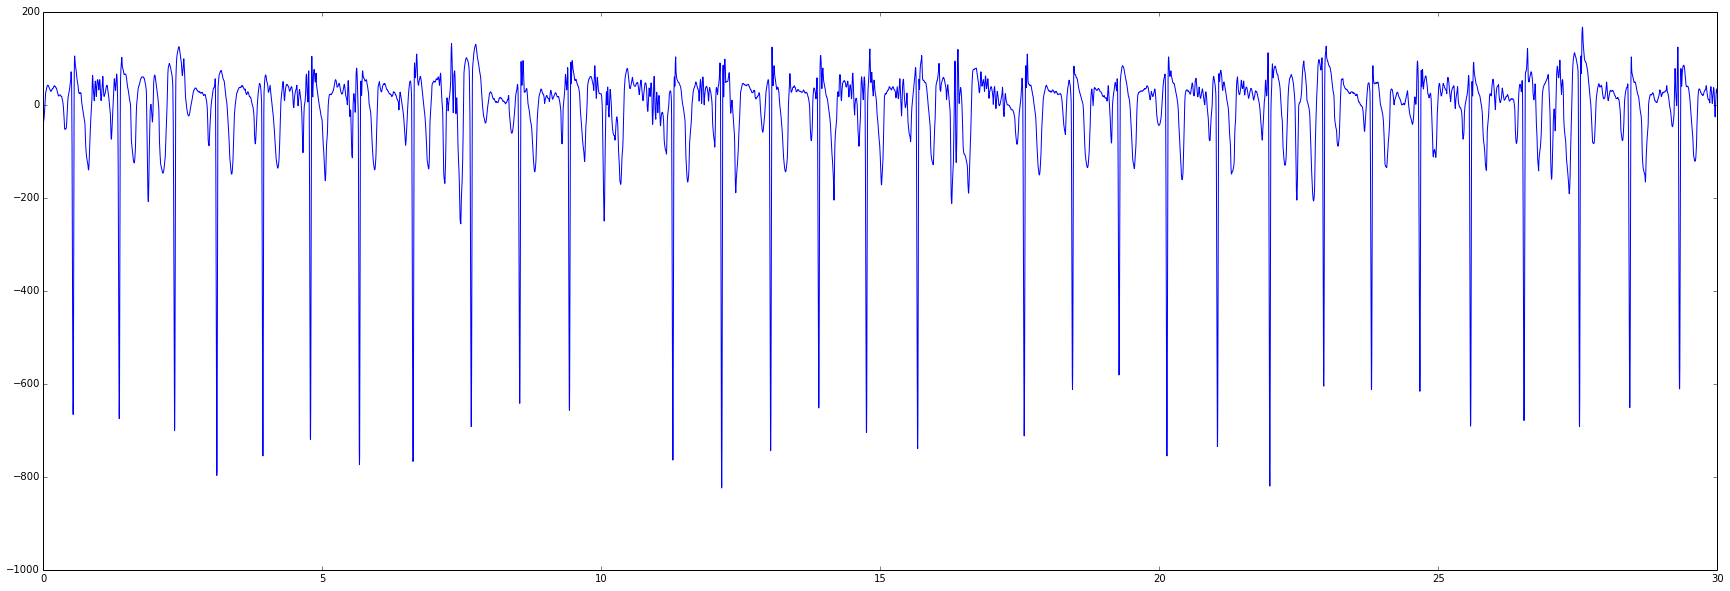

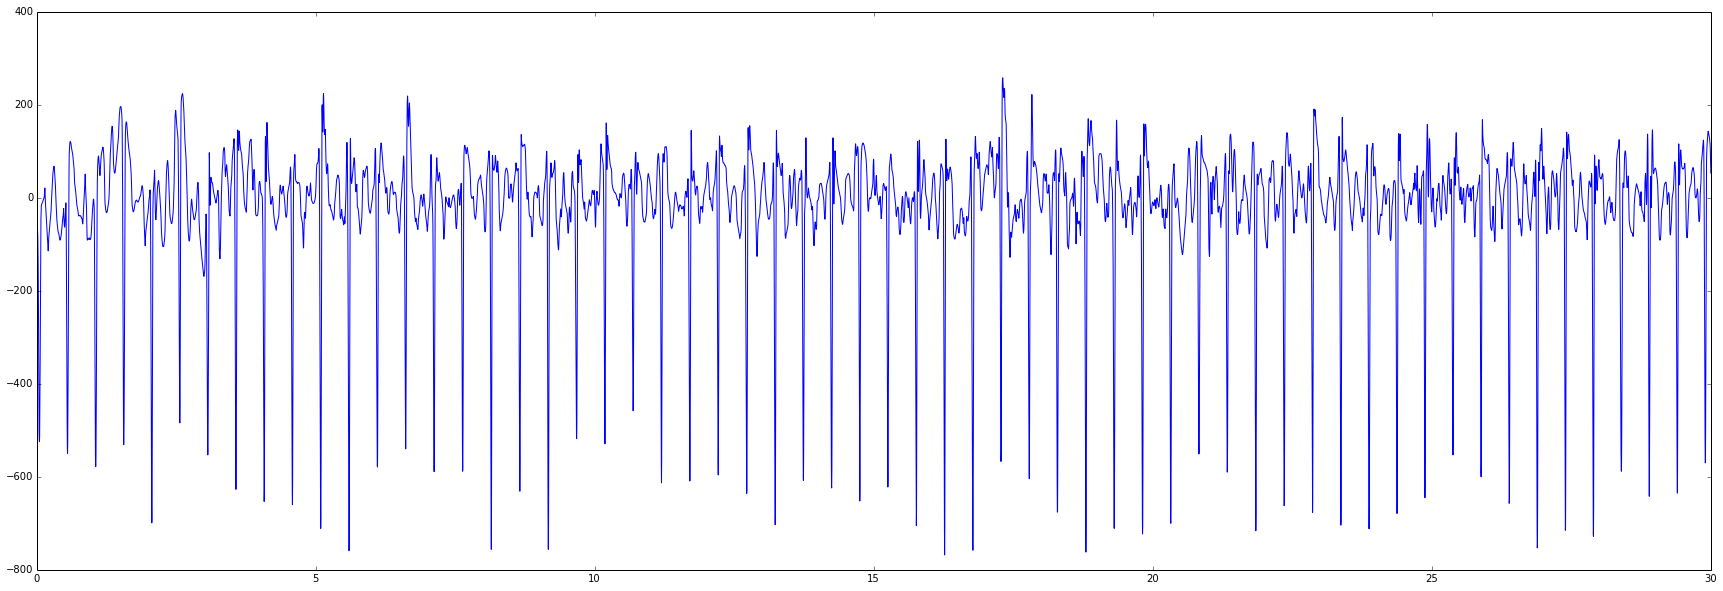

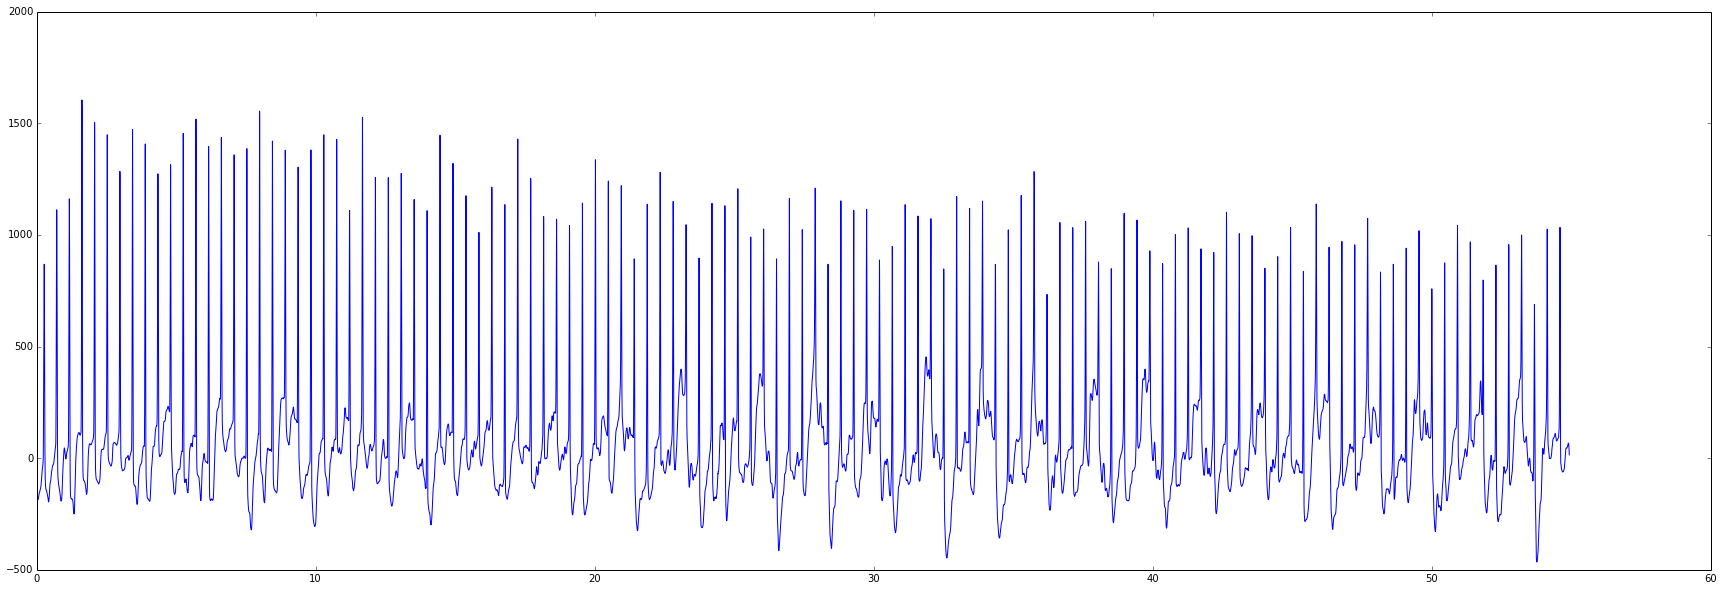

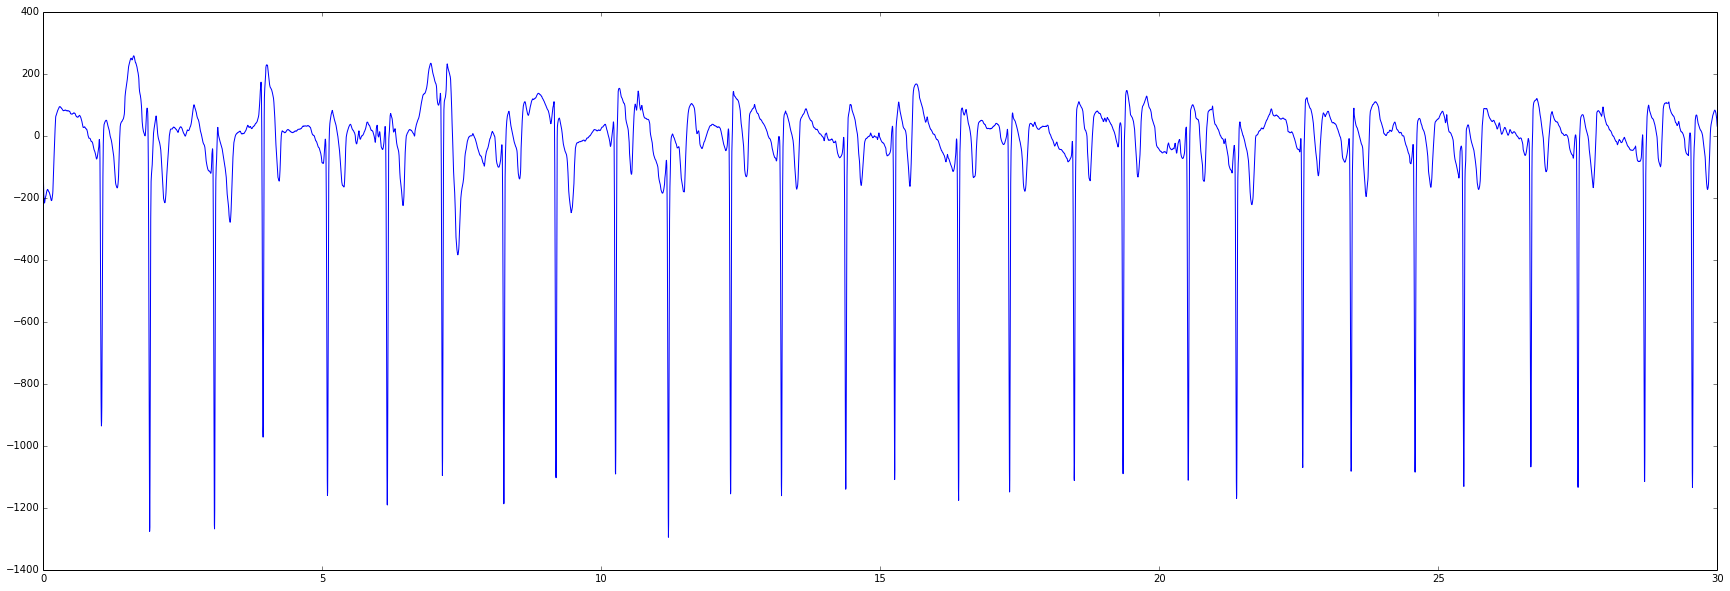

In [12]:
for fname in top_normal:
    data = scipy.io.loadmat('data/raw/training2017/' + fname)['val'][0]
    time = np.linspace(0,len(data)/300.,len(data))
    plt.plot(time, data)
    plt.show()

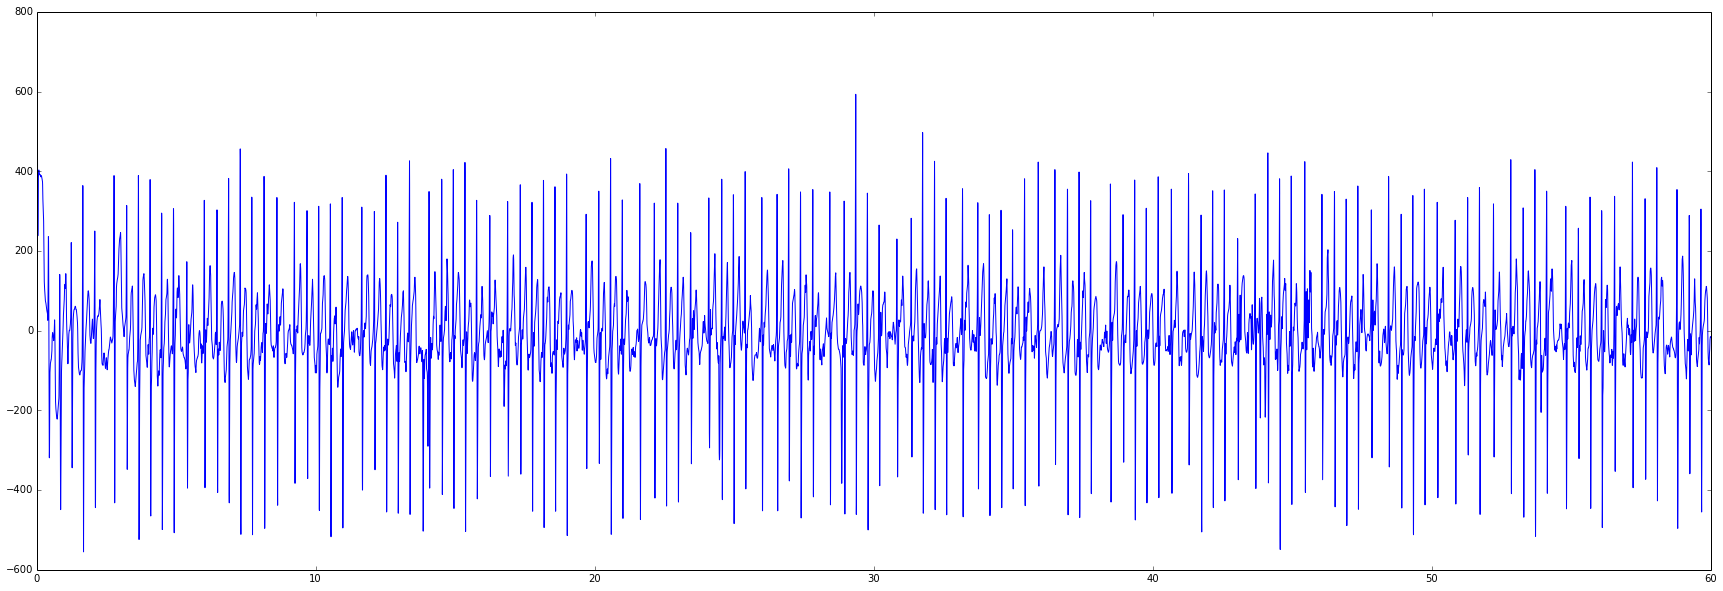

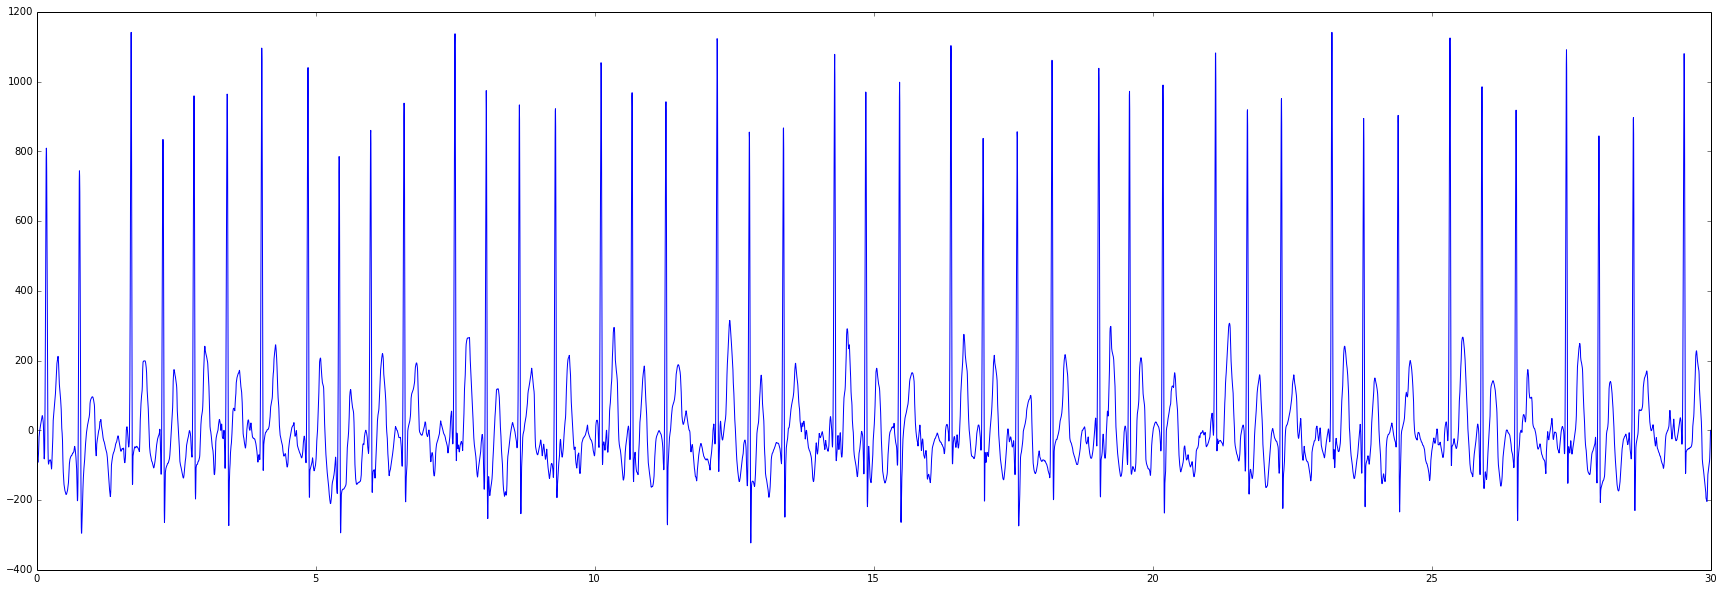

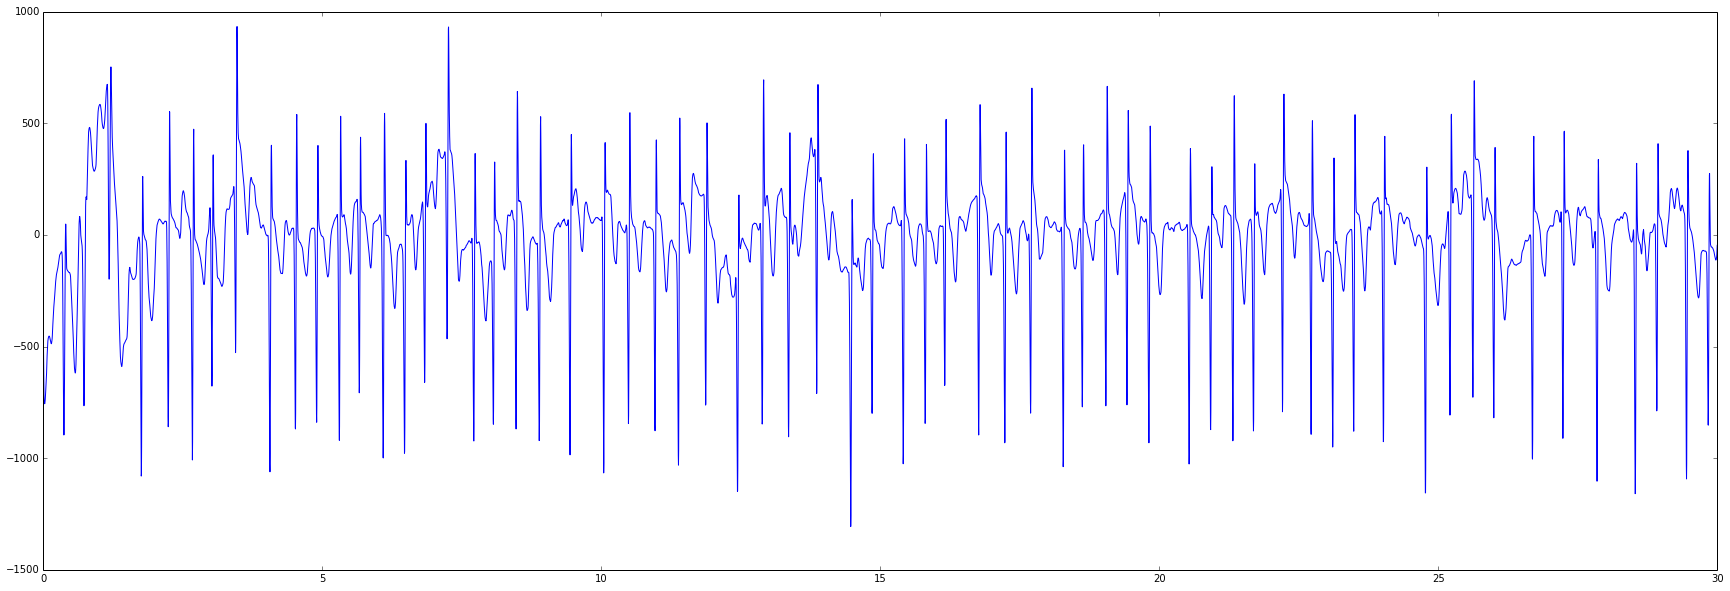

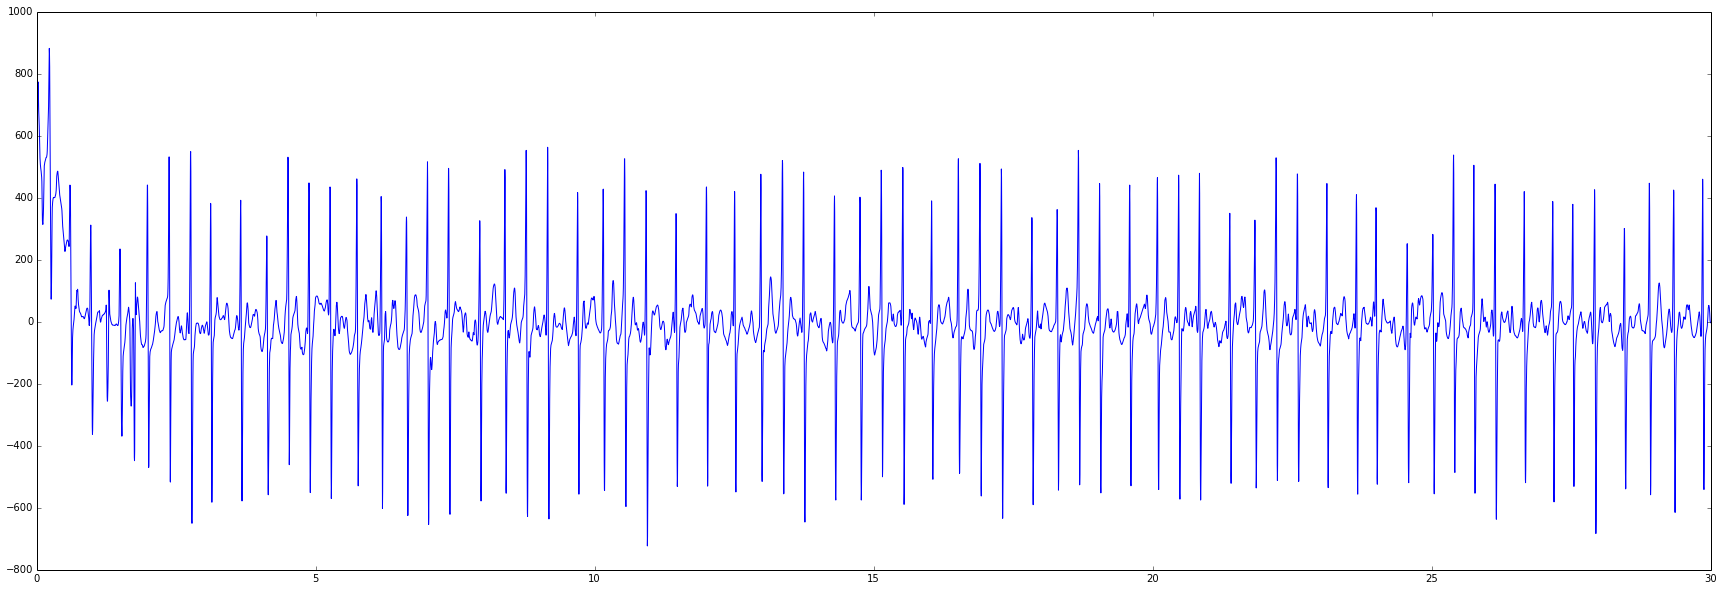

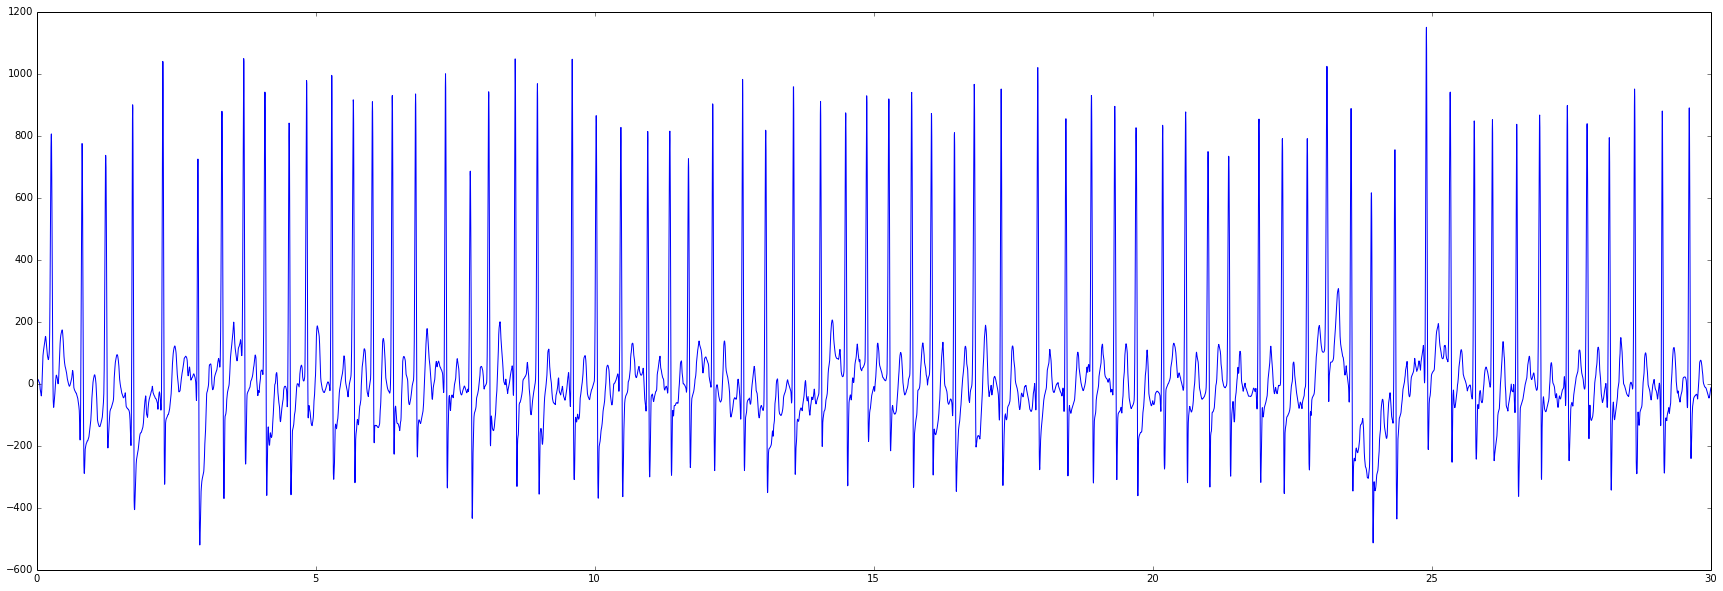

In [15]:
for fname in top_af:
    data = scipy.io.loadmat('data/raw/training2017/' + fname)['val'][0]
    time = np.linspace(0,len(data)/300.,len(data))
    plt.plot(time, data)
    plt.show()